In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

### Parameters

In [ ]:
L = 10.0
Total_time = 200
g = 9.81
N_x = 50 #real points aside from boundary
N_t = 200
dx = L / (N_x + 2)
x = np.linspace(0, L, N_x + 2)

### Boundarie Conditions

In [32]:
#Boundary conditions
h_left = lambda t: 0.005#Can make boundary a function of t
h_right = lambda t: 0.005

u_left = lambda t: 0.005
u_right = lambda t: 0.005

# Initial conditions
h_initial = np.ones(N_x) * 100
u_initial = np.ones(N_x) * 20


### System of Equations

In [33]:
def central_difference(v, dx, i):
    return (v[i+1] - v[i-1])/(2*dx)

def pde_system(t, y):
    # 0 index used for first real point in grid after boundary
    # N_x-1 index used for last real point in grid before boundary
    h = y[:N_x]
    u = y[N_x:]

    dh_dx = np.zeros(N_x)
    du_dx = np.zeros(N_x)
    dh_dt = np.zeros(N_x)
    du_dt = np.zeros(N_x)

    for i in range(1, N_x - 1):
        dh_dx[i] = central_difference(h, dx, i)
        du_dx[i] = central_difference(u, dx, i)

    #Differential equations for points next to the boundary
    dh_dt[0] = -1/(2*dx) * (h[0] * (u[1] - u_left(t))  - u[0] * (h[1] - h_left(t)))
    du_dt[0] = -1/(2*dx) * (g*(h[1] - h_left(t)) + u[0]*(u[1] - u_left(t)))
    dh_dt[N_x - 1] = -1/(2*dx) * (h[N_x - 1] * (u_right(t) - u[N_x - 2])  - u[N_x - 1] * (h_right(t) - h[N_x - 2]))
    du_dt[N_x - 1] = -1/(2*dx) * (g*(h_right(t) - h[N_x - 2]) + u[N_x - 1]*(u_right(t) - u[N_x  -2]))    

    #Differential equations for other points
    for i in range(1, N_x - 1):
        dh_dt[i] = - h[i] * du_dx[i] - u[i] * dh_dx[i]
        du_dt[i] = - u[i] * du_dx[i] - g * dh_dx[i]
    
    return np.concatenate((dh_dt, du_dt))

### Solving the System

In [34]:
t0 = 0
tf = Total_time
y0 = np.concatenate((h_initial, u_initial))
sol1 = solve_ivp(pde_system, t_span=(0,tf), y0=y0)

In [35]:
#Retrieve information from solution of IVP
h_results_no_boundary = sol1.y[:N_x]
u_results_no_boundary = sol1.y[N_x:]
t_points = sol1.t
# Create a meshgrid for the 3D plot
T, X = np.meshgrid(t_points,x)

In [36]:
X1, T1 = np.meshgrid(x, t_points) #To consider correct orientation of axis

In [37]:
h_left_boundary_evolution = np.array([[h_left(t) for t in t_points]]) #Evolution of boundary for results vector
h_right_boundary_evolution = np.array([[h_right(t) for t in t_points]])
u_left_boundary_evolution = np.array([[u_left(t) for t in t_points]])
u_right_boundary_evolution = np.array([[u_right(t) for t in t_points]])

h_results = np.concatenate((h_left_boundary_evolution, h_results_no_boundary, h_right_boundary_evolution)) #Add boundaries to results
u_results = np.concatenate((u_left_boundary_evolution, u_results_no_boundary, u_right_boundary_evolution))

h_results1 = h_results.transpose() #Used for orientation of axis
u_results1 = u_results.transpose()

### Plotting

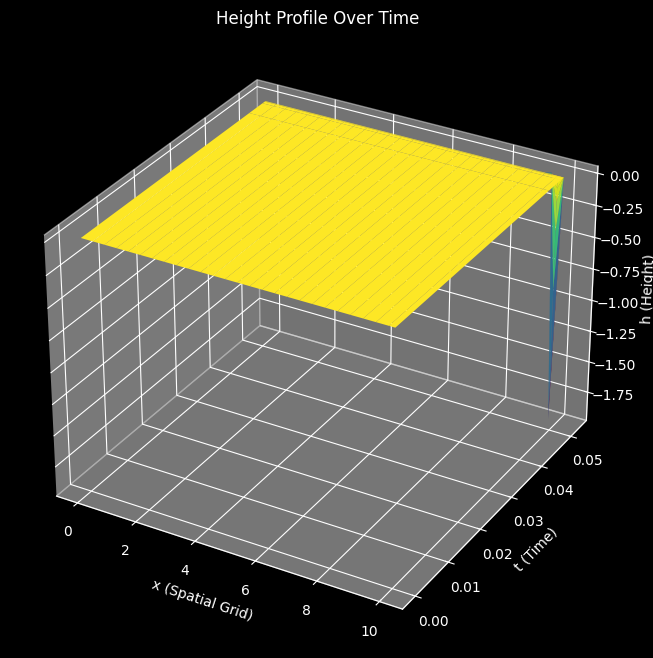

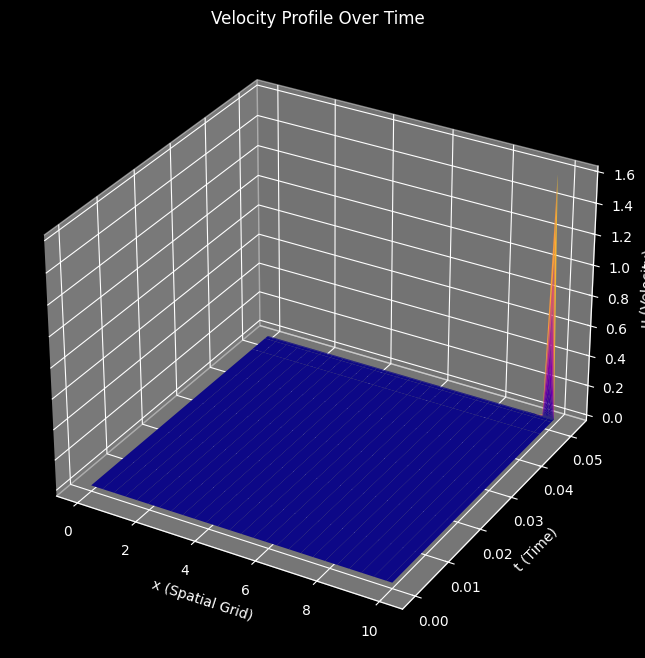

In [38]:
# Plot height (h) as a 3D surface
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, T1, h_results1, cmap='viridis', edgecolor='none')
ax.set_xlabel('x (Spatial Grid)')
ax.set_ylabel('t (Time)')
ax.set_zlabel('h (Height)')
ax.set_title('Height Profile Over Time')
plt.show()

# Plot velocity (u) as a 3D surface
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, T1, u_results1, cmap='plasma', edgecolor='none')
ax.set_xlabel('x (Spatial Grid)')
ax.set_ylabel('t (Time)')
ax.set_zlabel('u (Velocity)')
ax.set_title('Velocity Profile Over Time')
plt.show()